In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Урок 1. Алгоритм линейной регрессии. Градиентный спуск.

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
class GradientDescentParams:
    n: int
    alpha: float
    precision: float    
    w_start: list
        
    x = None
    y = None
    
    def __init__(self, n: int, alpha: float, precision: float, w_start: list, x, y):
        self.n = n
        self.alpha = alpha
        self.precision = precision
        self.w_start = w_start
        
        self.x = x
        self.y = y
    
    def __str__(self):
     return f'''
Number of objects = {self.n}
Learning rate = {self.alpha}
Precision = {self.precision}
Initial weights = {self.w_start}
     '''

class GradientDescentSolution:
    params: GradientDescentParams
        
    iteration: int
    prev_sol = None        
    w = None
    mse = float
    
    @property
    def mse_dif(self):
        return float('inf') if self.mse is None or self.prev_sol is None else self.prev_sol.mse - self.mse 
    
    def __init__(self, params, prev_solution): 
        self.params = params
        self.w = np.array(params.w_start)
        self.prev_sol = prev_solution
        
    def calc(self, iteration):
        self.iteration = iteration
        
        y_pred = np.dot(self.prev_sol.w, self.params.x)
        self.mse = calc_mse(self.params.y, y_pred)
        
        for k in range(self.w.shape[0]):
            self.w[k] = self.prev_sol.w[k] - self.params.alpha * (1/self.params.n * 2 * np.sum(self.params.x[k] * (y_pred - self.params.y)))
        
    def __str__(self):
        return f'Iteration #{self.iteration}: W_new = {self.w}, MSE = {self.mse:.8f}, MSE_dif = {self.mse_dif:.8f}'

### *3. Реализовать алгоритм градиентного спуска с оценкой  изменения ошибки
#### Решение:

In [5]:
params = GradientDescentParams(
    n=X.shape[1], 
    alpha=1e-2, 
    precision=1e-8,
    w_start=[1, 0.5],
    x=X,
    y=y)

print(params)

prev_solution = GradientDescentSolution(params, None)
prev_solution.mse = float('inf')

i = 0
while prev_solution.mse_dif > params.precision:  
    solution = GradientDescentSolution(params, prev_solution)
    solution.calc(i)
    
    if i % 100 == 0:
        print(solution)
        
    prev_solution = solution
    params.alpha /= 1.1
    i += 1
    
print()
print(solution.prev_sol)
print(solution)


Number of objects = 10
Learning rate = 0.01
Precision = 1e-08
Initial weights = [1, 0.5]
     
Iteration #0: W_new = [2.08 4.27], MSE = 3047.75000000, MSE_dif = inf
Iteration #100: W_new = [ 6.9823677  10.56249781], MSE = 726.38328927, MSE_dif = 0.00101590
Iteration #200: W_new = [ 6.98262645 10.56249041], MSE = 726.37313118, MSE_dif = 0.00000007

Iteration #220: W_new = [ 6.98262646 10.56249041], MSE = 726.37313055, MSE_dif = 0.00000001
Iteration #221: W_new = [ 6.98262646 10.56249041], MSE = 726.37313054, MSE_dif = 0.00000001


### 1. Подберите скорость обучения (alpha) и количество итераций
#### Решение:

In [6]:
factors = np.arange(0.1, 2, 0.1)
iteration_counts = []

print('alpha delimeter\titeration count\terror dif')

for factor in factors:
    
    params = GradientDescentParams(
    n=X.shape[1], 
    alpha=1e-2, 
    precision=1e-8,
    w_start=[1, 0.5],
    x=X,
    y=y)    
    
    prev_solution = GradientDescentSolution(params, None)
    prev_solution.mse = float('inf')

    i = 0
    while prev_solution.mse_dif > params.precision:  
        solution = GradientDescentSolution(params, prev_solution)
        solution.calc(i)

        prev_solution = solution
        params.alpha /= factor
        i += 1
        
    iteration_counts.append(i)
    print(f'{factor:.1f}\t\t{i}\t\t{solution.mse_dif}')

alpha delimeter	iteration count	error dif
0.1		3		-4697.758224000003
0.2		4		-30608.79681599998
0.3		4		-46.57116562962949
0.4		5		-190.6168807617164
0.5		6		-706.9663948475445
0.6		9		-7799.063832429211
0.7		11		-38.180033043446485
0.8		16		-51.821391197423964
0.9		34		-268.722732234187
1.0		1156		9.92775994745898e-09
1.1		222		9.961354408005718e-09
1.2		122		8.649067240185104e-09
1.3		89		7.856215233914554e-09
1.4		71		9.089717423194088e-09
1.5		60		9.498990038991906e-09
1.6		53		7.646121957805008e-09
1.7		47		9.945551937562414e-09
1.8		43		9.074710760614835e-09
1.9		40		7.503558663302101e-09


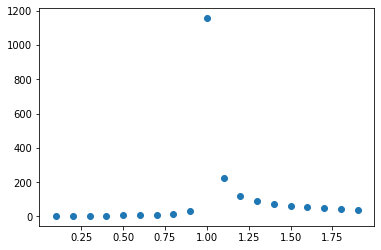

In [7]:
plt.scatter(factors, iteration_counts);

### *2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее
#### Решение:

In [8]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))

    sum_list = list((map(sum, X * (y_pred - y))))
    W -= alpha * (1/n * 2 * np.array(sum_list))
    
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
